In [1]:
import numpy as np
import h5py
import pyemma
import matplotlib.pyplot as plt
import os
import westpa
from westpa.analysis import Run

In [2]:
#this barely needs to be a method but having the .h5 stuff compartmentalized is nice
def load_h5_pcs(h5path, miniter, maxiter):
    
    run = Run.open(h5path)

    #set maximum iteration automatically
    if maxiter == -1:
        maxiter = run.num_iterations

    pcs = [iteration.pcoords for iteration in run if (iteration.number >= miniter and iteration.number < maxiter)]

    return pcs

In [3]:
def recursive_npyloader(files, npypath, x):
    
    for j in range(x, 0, -10):
        if f"pc_data_{j}_v1.npy" in files:
            try:
                print(f"loading {npypath}/pc_data_{j}_v1.npy")
                data_seg = np.load(f"{npypath}/pc_data_{j}_v1.npy")
                
                #print(min(data_seg[:,0]))
                if min(data_seg[:,0])>1:
                    data_loaded = recursive_npyloader(files, npypath, int(min(data_seg[:,0])-1))
                else:
                    data_loaded = []
                
                data_loaded.append(data_seg)
                
                break
            except Exception as e:
                print(f"skipped {npypath}/pc_data_{j}_v1.npy with exception {e}")

    return data_loaded

    
def npyloader(npypath):

    files = os.listdir(npypath)
    #print(files)
    rf_data = recursive_npyloader(files, npypath, 10000)
    rf_data = np.concatenate(rf_data)
    
    return rf_data

In [4]:
#specify input file

cftr_west = "/home/jonathan/Documents/grabelab/cftr/chloe-data"
cftr_refpc = "/home/jonathan/Documents/grabelab/cftr/refeaturization"

h5paths_names = [[f"{cftr_west}/wstp_cftr_1_degrabo/west-040925.h5", f"{cftr_refpc}/nonlip_glpg_1", "pyrazole-1", "blue"],
                  [f"{cftr_west}/wstp_cftr_2_wynton/west-040925.h5", f"{cftr_refpc}/nonlip_glpg_2", "pyrazole-2", "cyan"],
                  [f"{cftr_west}/wstp_lip_glpg_1/west-040925.h5", f"{cftr_refpc}/lip_glpg_1", "undecanol-1", "red"],
                  [f"{cftr_west}/wstp_lip_glpg_2/west-040925.h5", f"{cftr_refpc}/lip_glpg_2", "undecanol-2", "orange"]]

#westpa rounds to load
minround = 0
maxround = -1

loading /home/jonathan/Documents/grabelab/cftr/refeaturization/nonlip_glpg_1/pc_data_1870_v1.npy
loading /home/jonathan/Documents/grabelab/cftr/refeaturization/nonlip_glpg_1/pc_data_1500_v1.npy
loading /home/jonathan/Documents/grabelab/cftr/refeaturization/nonlip_glpg_1/pc_data_1000_v1.npy
loading /home/jonathan/Documents/grabelab/cftr/refeaturization/nonlip_glpg_1/pc_data_680_v1.npy
loading /home/jonathan/Documents/grabelab/cftr/refeaturization/nonlip_glpg_1/pc_data_660_v1.npy
loading /home/jonathan/Documents/grabelab/cftr/refeaturization/nonlip_glpg_1/pc_data_620_v1.npy
loading /home/jonathan/Documents/grabelab/cftr/refeaturization/nonlip_glpg_1/pc_data_490_v1.npy


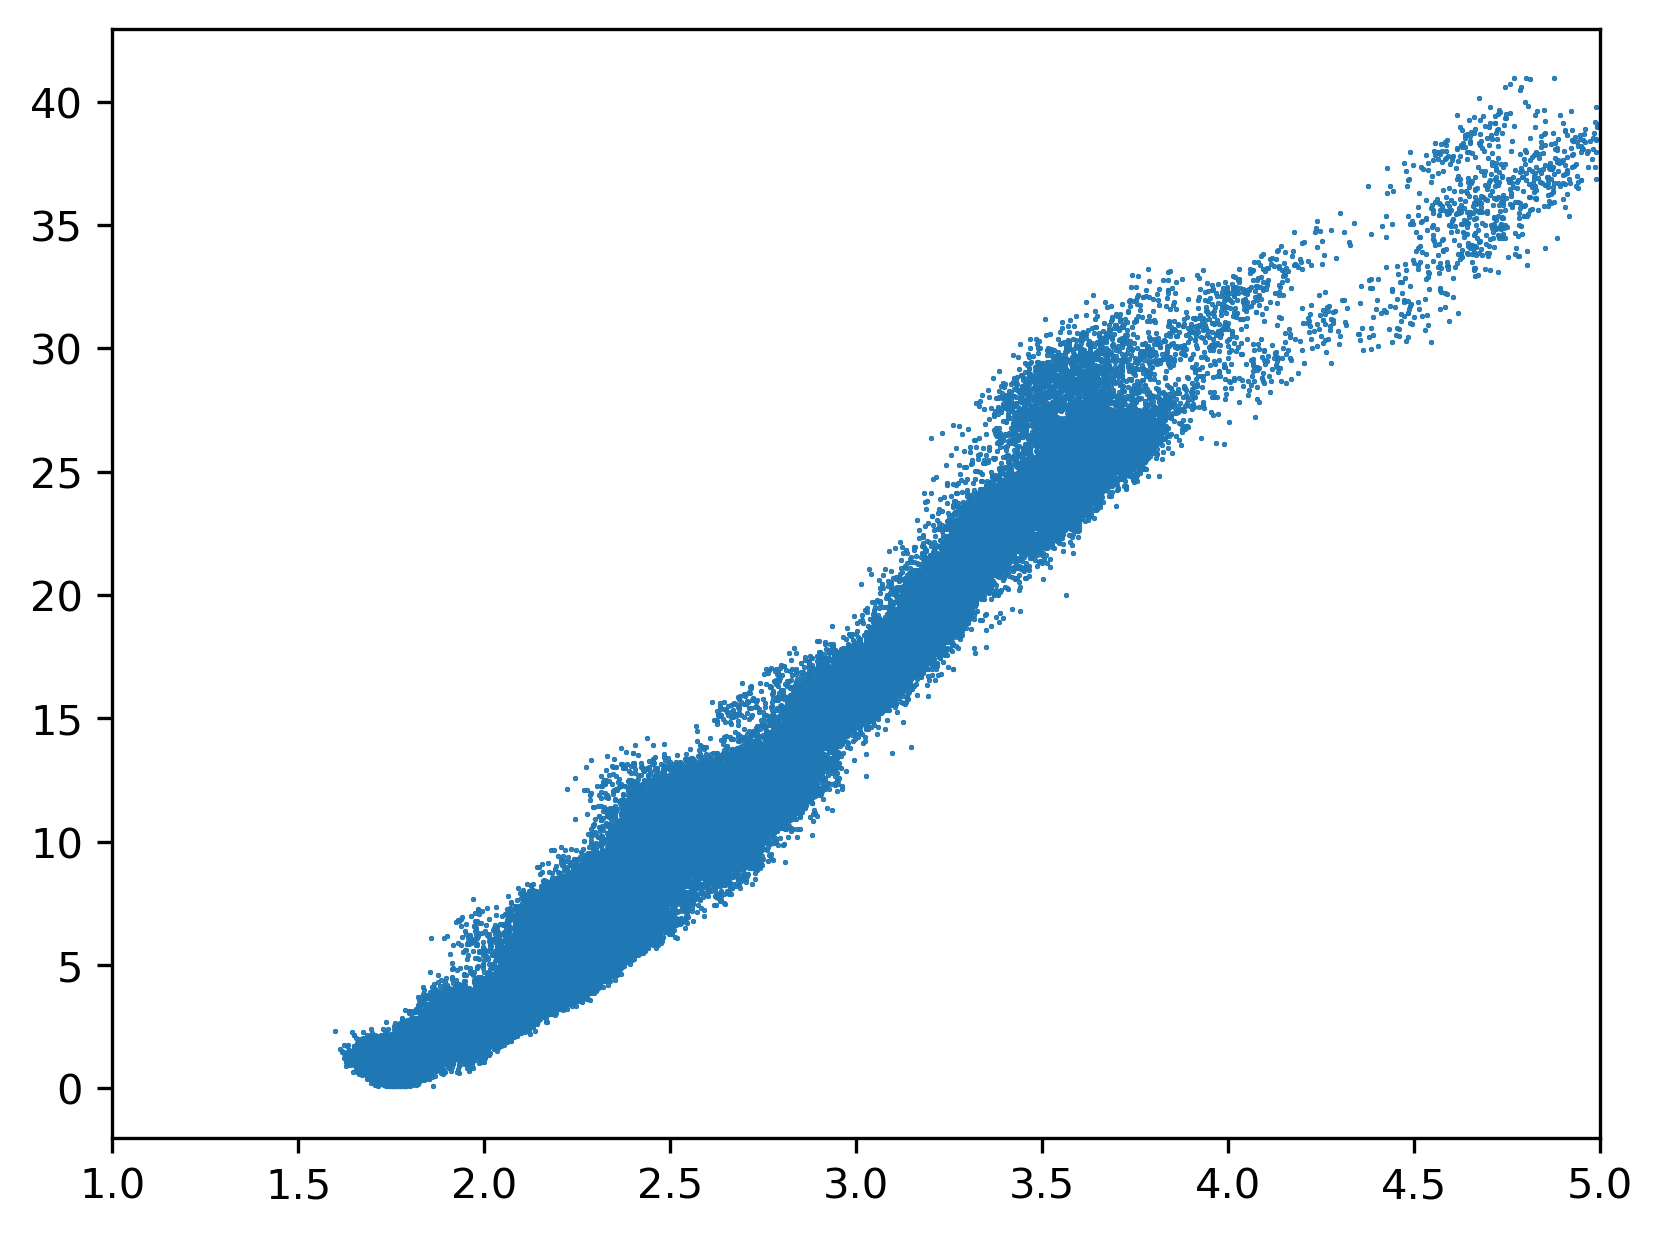

loading /home/jonathan/Documents/grabelab/cftr/refeaturization/nonlip_glpg_2/pc_data_660_v1.npy
loading /home/jonathan/Documents/grabelab/cftr/refeaturization/nonlip_glpg_2/pc_data_650_v1.npy


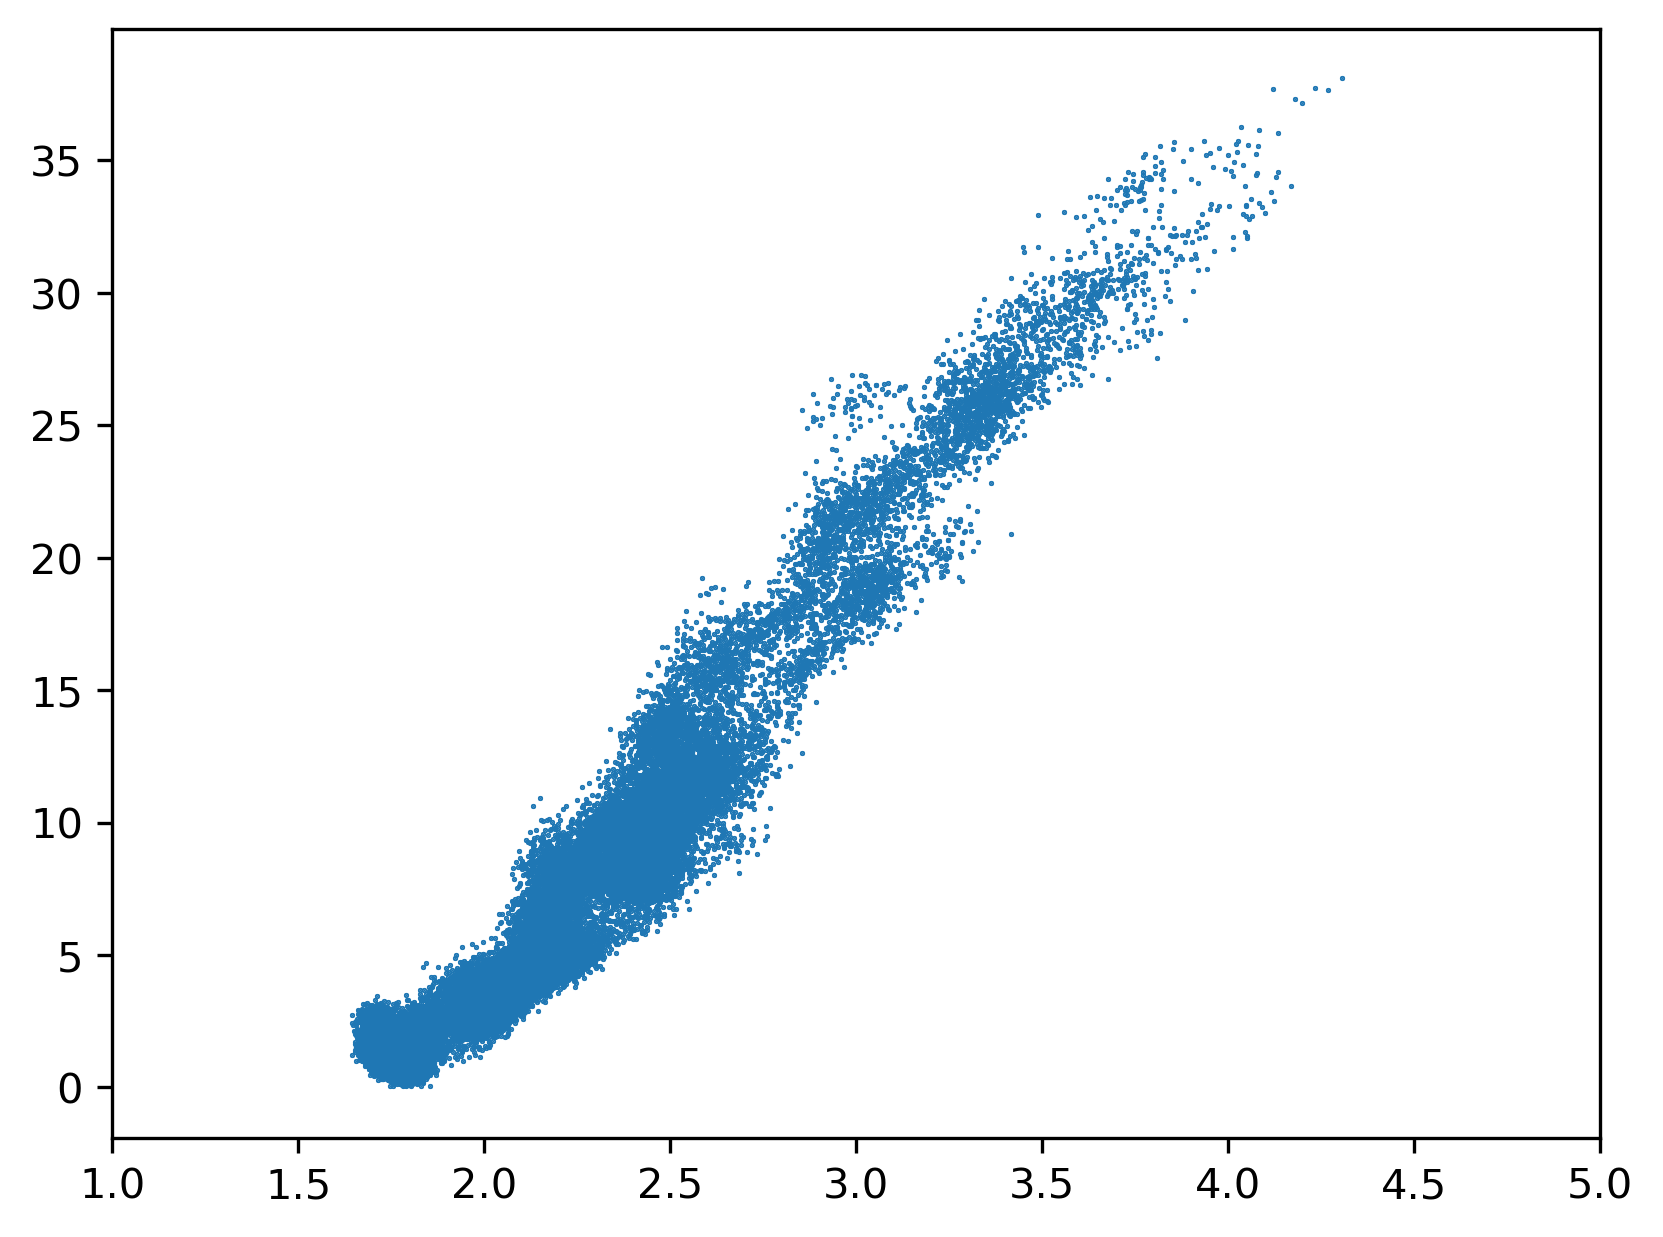

loading /home/jonathan/Documents/grabelab/cftr/refeaturization/lip_glpg_1/pc_data_1980_v1.npy
loading /home/jonathan/Documents/grabelab/cftr/refeaturization/lip_glpg_1/pc_data_1610_v1.npy
skipped /home/jonathan/Documents/grabelab/cftr/refeaturization/lip_glpg_1/pc_data_1610_v1.npy with exception cannot access local variable 'data_loaded' where it is not associated with a value
loading /home/jonathan/Documents/grabelab/cftr/refeaturization/lip_glpg_1/pc_data_1600_v1.npy
skipped /home/jonathan/Documents/grabelab/cftr/refeaturization/lip_glpg_1/pc_data_1600_v1.npy with exception cannot access local variable 'data_loaded' where it is not associated with a value
loading /home/jonathan/Documents/grabelab/cftr/refeaturization/lip_glpg_1/pc_data_1590_v1.npy
skipped /home/jonathan/Documents/grabelab/cftr/refeaturization/lip_glpg_1/pc_data_1590_v1.npy with exception cannot access local variable 'data_loaded' where it is not associated with a value
loading /home/jonathan/Documents/grabelab/cftr/r

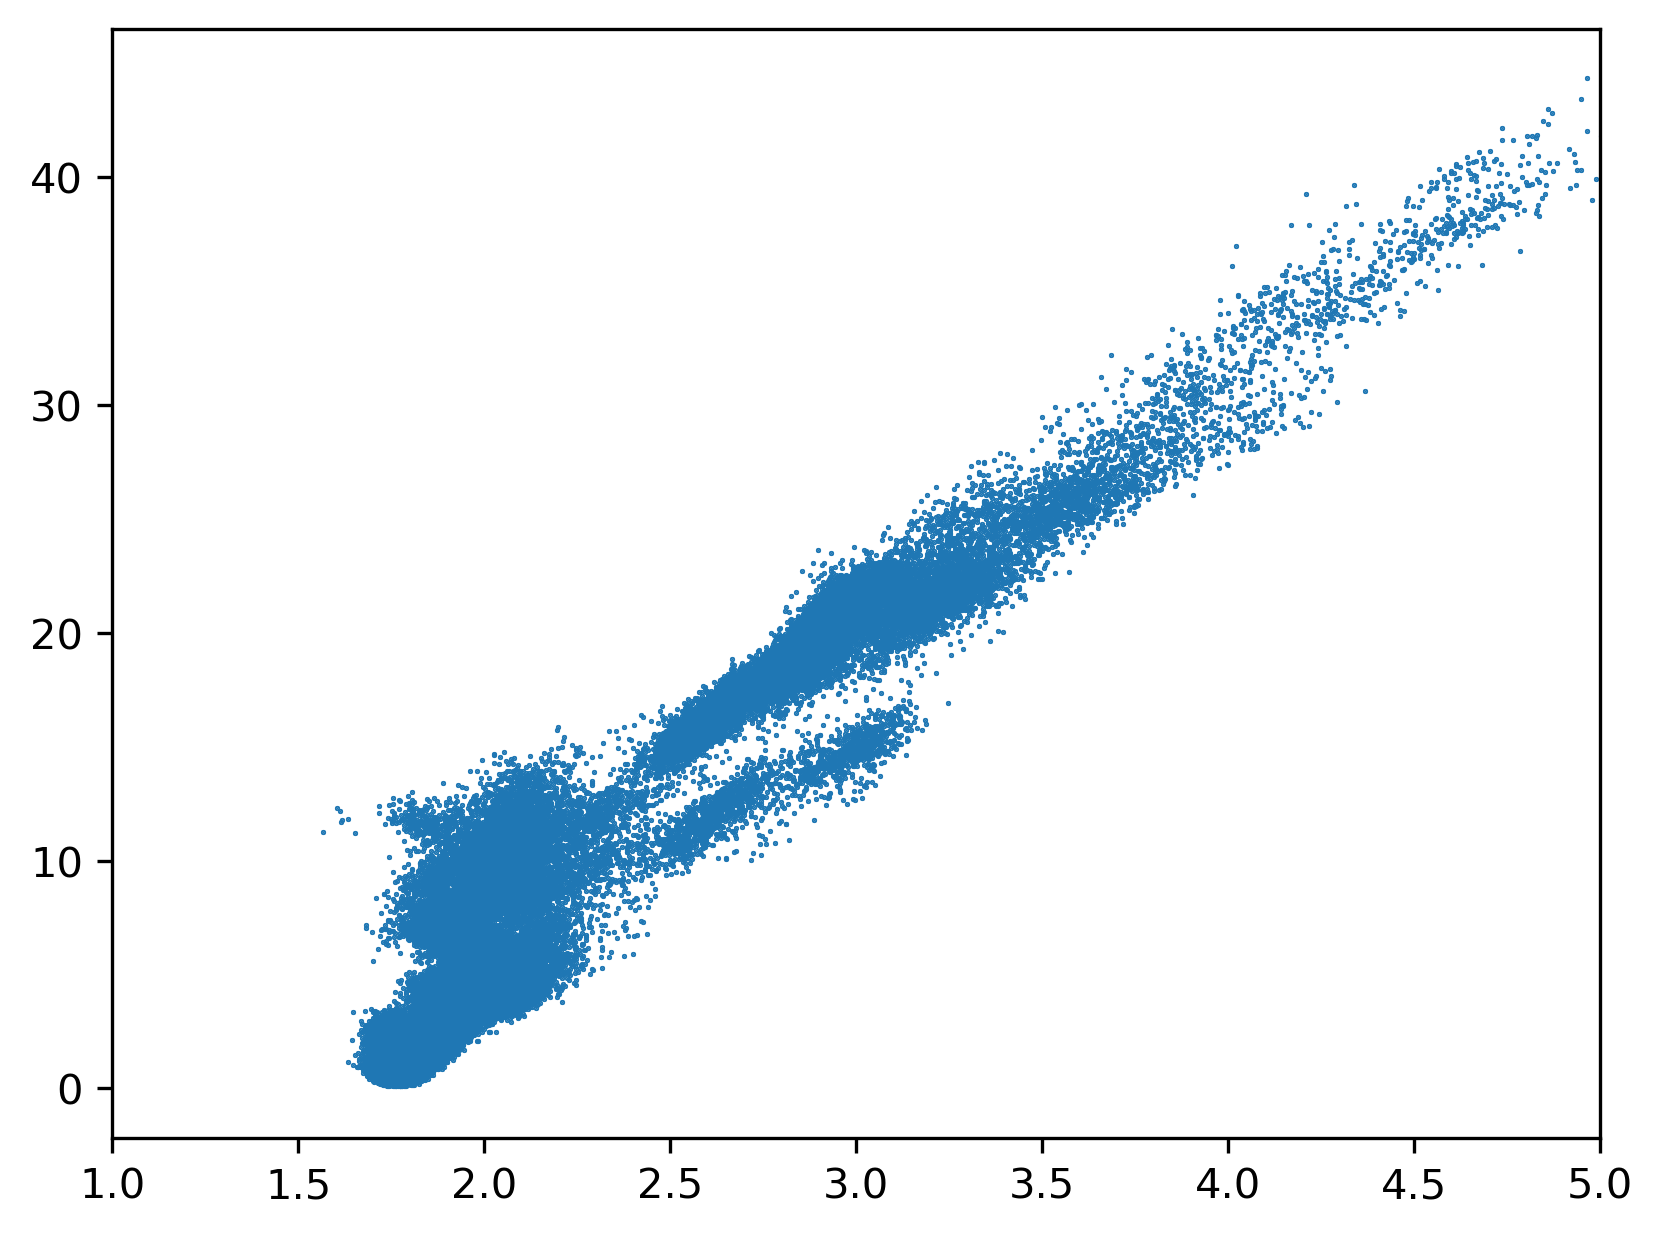

loading /home/jonathan/Documents/grabelab/cftr/refeaturization/lip_glpg_2/pc_data_1990_v1.npy
loading /home/jonathan/Documents/grabelab/cftr/refeaturization/lip_glpg_2/pc_data_1750_v1.npy
loading /home/jonathan/Documents/grabelab/cftr/refeaturization/lip_glpg_2/pc_data_1430_v1.npy
loading /home/jonathan/Documents/grabelab/cftr/refeaturization/lip_glpg_2/pc_data_1000_v1.npy


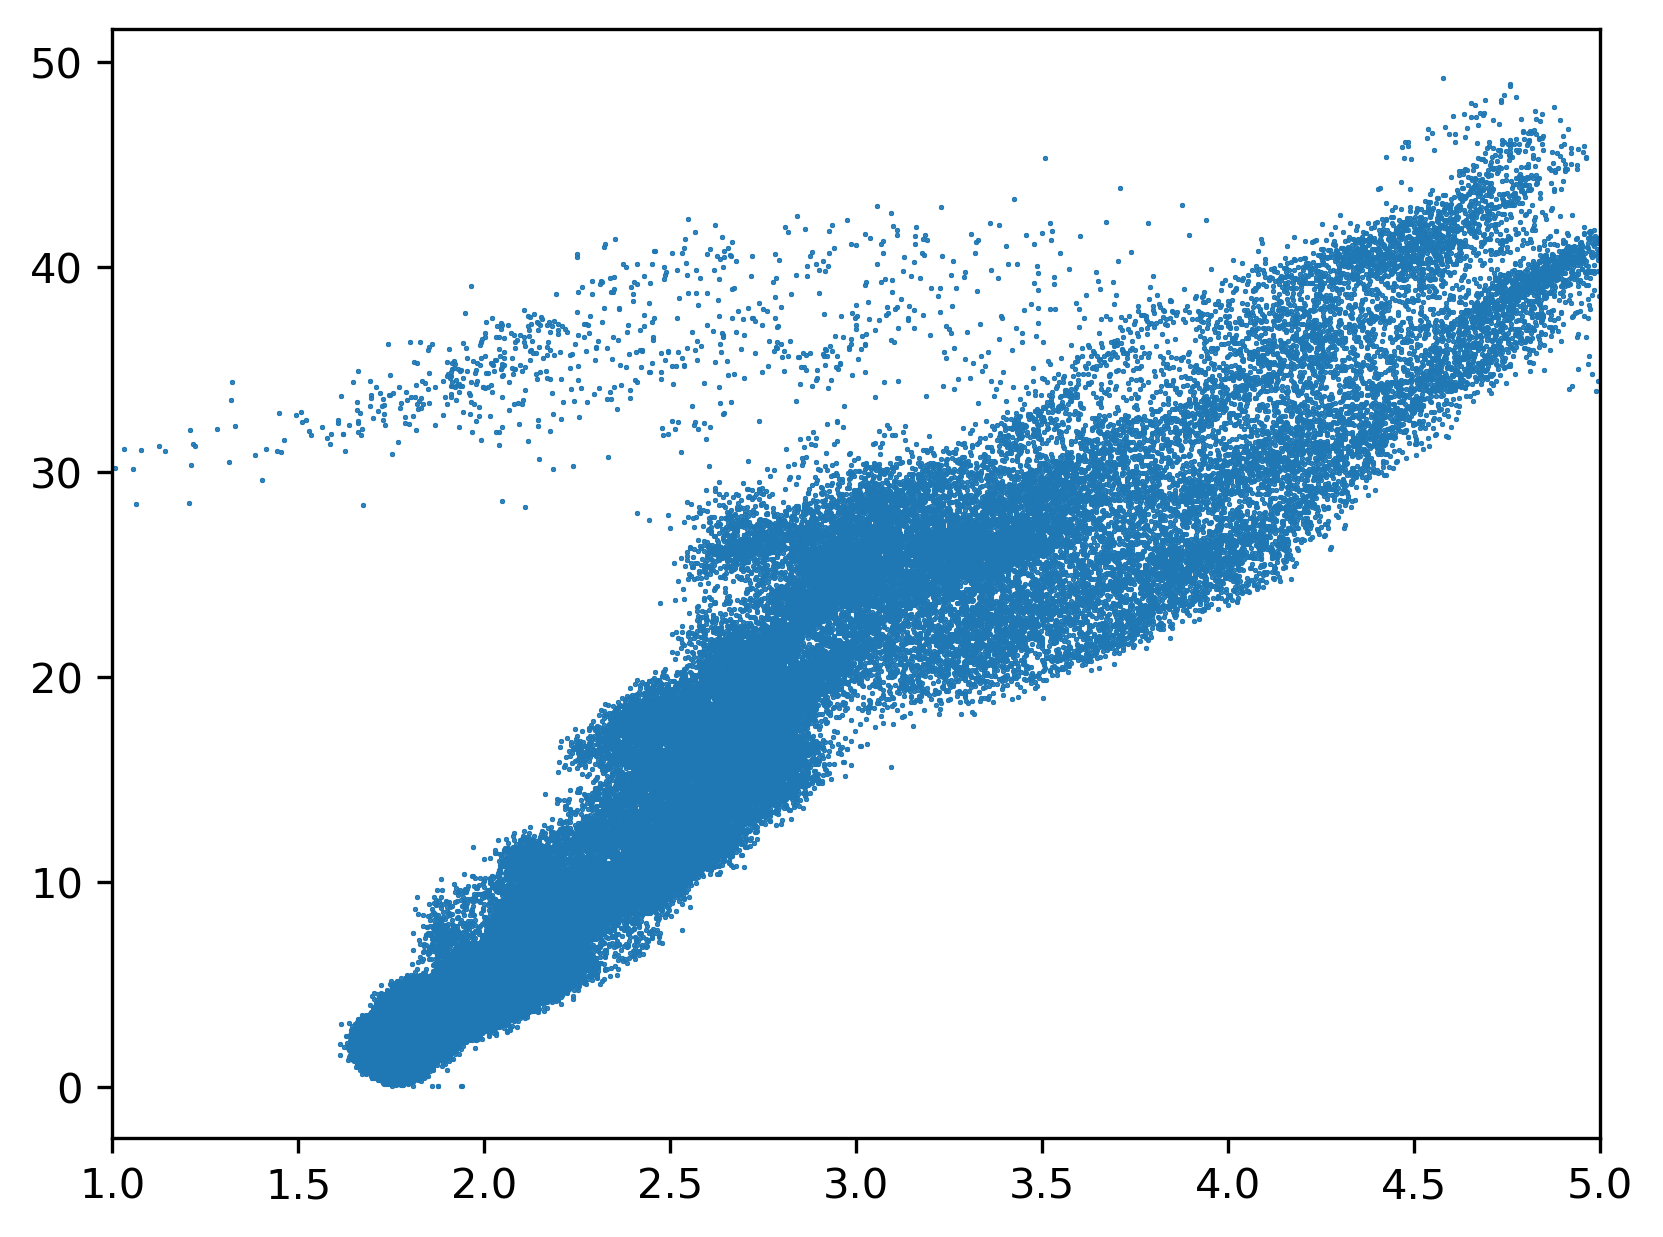

In [8]:
# fig, ax = plt.subplots()
# fig.set_dpi(300)

scatter = True

for hi in range(4):

    radial_pc = npyloader(h5paths_names[hi][1])
    binding_site_pc = load_h5_pcs(h5paths_names[hi][0], minround, maxround)

    pc_r_paired = []
    pc_site_paired = []
    
    for rpci in radial_pc:
        pc_r_paired.append(rpci[2])
        pc_site_paired.append(binding_site_pc[int(round(rpci[0]-1))][int(round(rpci[1]))][-1][0])

    #ax.scatter(pc_r_paired, pc_site_paired, marker=',', s=(72./fig.dpi)**2, color = h5paths_names[hi][3]) 

    fig, ax = plt.subplots()
    fig.set_dpi(300)
    
    if not scatter:
        plt.hist2d(pc_r_paired, pc_site_paired, range=[[1,5],[0,30]], bins = (500,500))
    else:
        ax.scatter(pc_r_paired, pc_site_paired, marker=',', s=(72./fig.dpi)**2) 

    plt.xlim(1,5)

    
    plt.show()

In [6]:
pc_r_paired = []
pc_site_paired = []

for rpci in radial_pc:
    #try:
    pc_r_paired.append(rpci[2])
    pc_site_paired.append(binding_site_pc[int(round(rpci[0]-1))][int(round(rpci[1]))][-1][0])
    #except exception as e:
    #    print(e)
    #    print(f"could not find pc data for {rpci[0]}, {rpci[1]}")

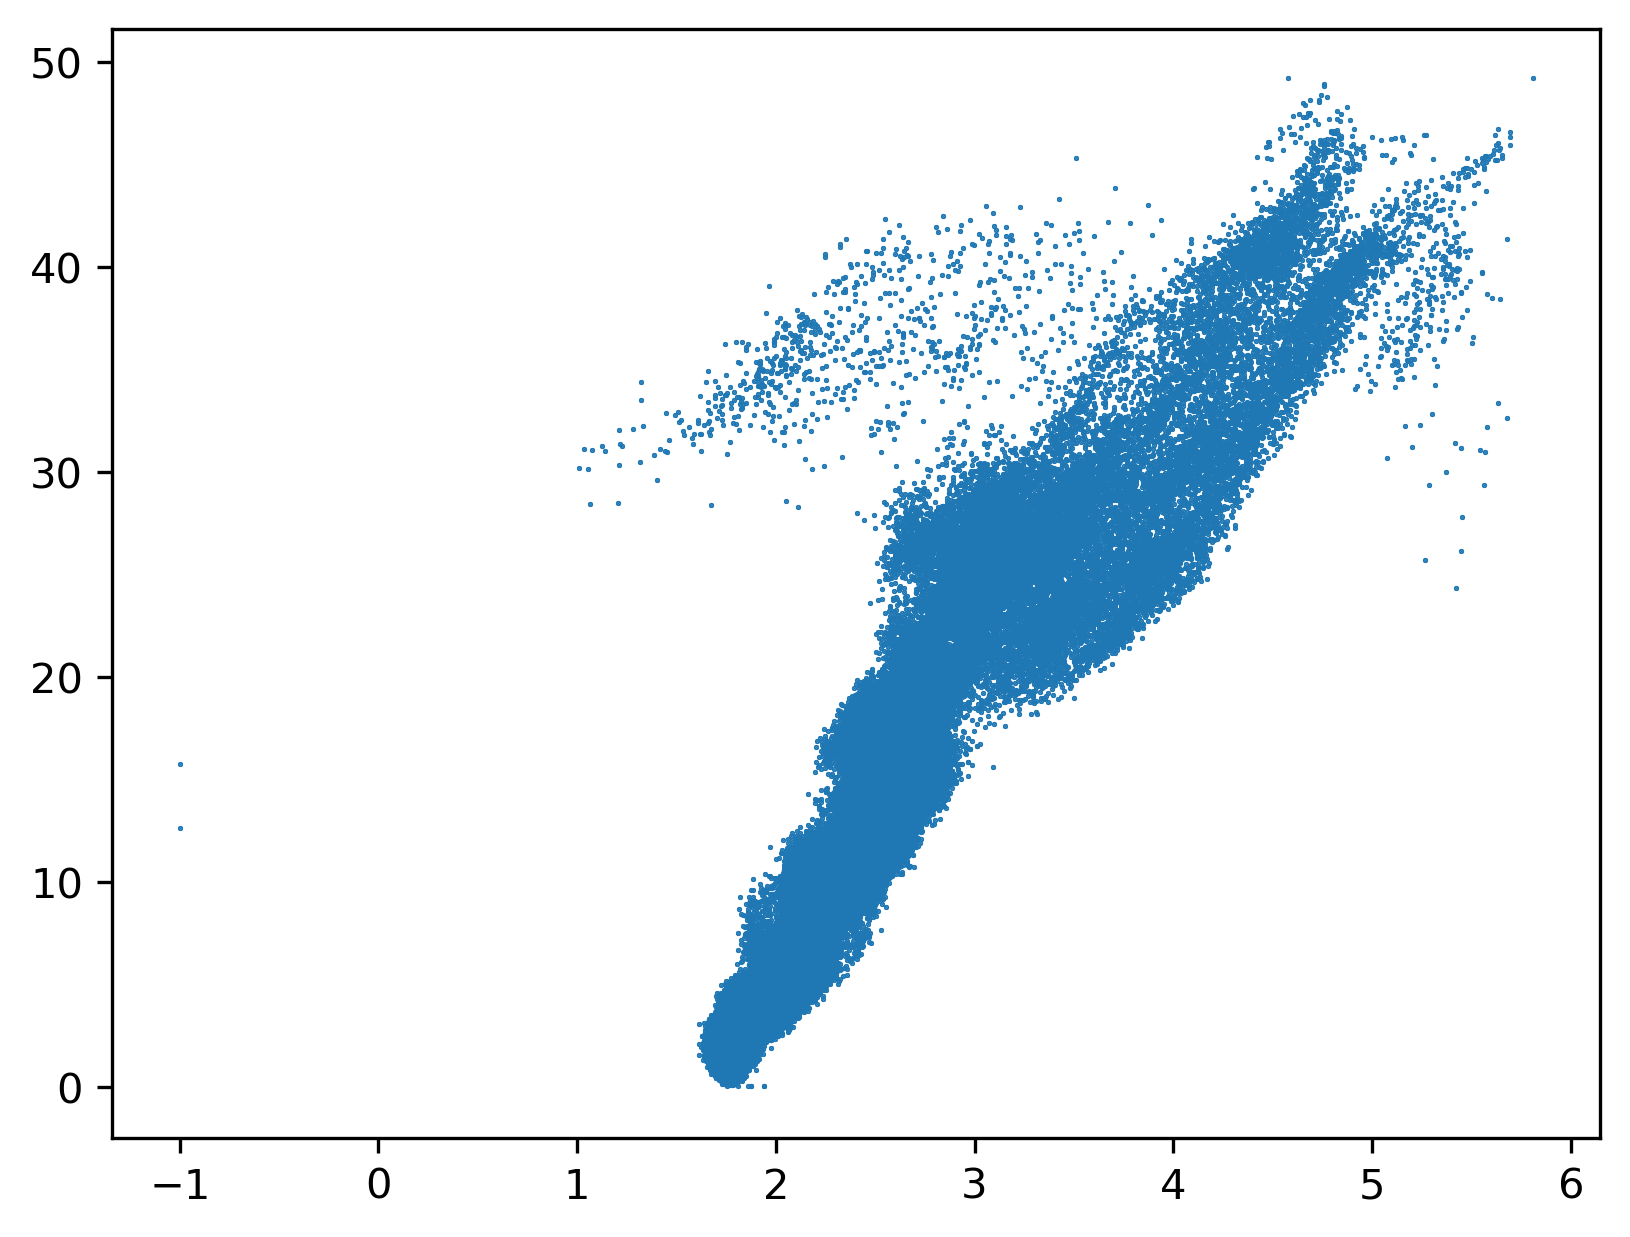

In [7]:
fig, ax = plt.subplots()
fig.set_dpi(300)
ax.scatter(pc_r_paired, pc_site_paired, marker=',', s=(72./fig.dpi)**2) 

#plt.scatter(pc_r_paired, pc_site_paired, marker=".", dpi=600)

(1.0, 4.5)

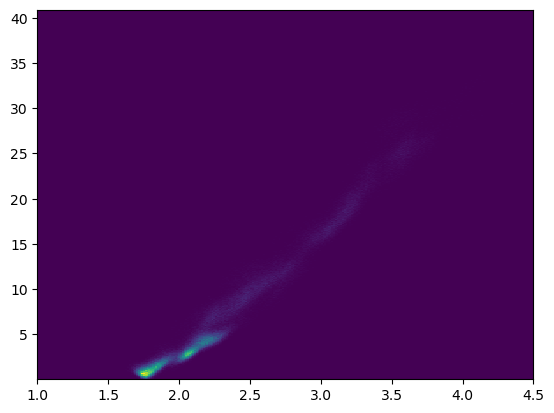

In [80]:
pairs = [[i,j] for i,j in zip(pc_r_paired, pc_site_paired)]

plt.hist2d(pc_r_paired, pc_site_paired, bins = (500,500))
plt.xlim(1,5)

In [75]:
pc_site_paired

[array([0.62582713], dtype=float32),
 array([1.0325272], dtype=float32),
 array([0.56982714], dtype=float32),
 array([0.7676271], dtype=float32),
 array([0.67722714], dtype=float32),
 array([1.1132271], dtype=float32),
 array([0.7249271], dtype=float32),
 array([1.0273272], dtype=float32),
 array([1.6096272], dtype=float32),
 array([1.0301272], dtype=float32),
 array([0.8696271], dtype=float32),
 array([1.0567272], dtype=float32),
 array([0.6728271], dtype=float32),
 array([0.91962713], dtype=float32),
 array([0.8685272], dtype=float32),
 array([0.67842716], dtype=float32),
 array([1.2010345], dtype=float32),
 array([1.6673346], dtype=float32),
 array([0.7617346], dtype=float32),
 array([0.68713456], dtype=float32),
 array([0.81233454], dtype=float32),
 array([1.2278346], dtype=float32),
 array([1.1537346], dtype=float32),
 array([2.0377345], dtype=float32),
 array([1.0174346], dtype=float32),
 array([0.44933456], dtype=float32),
 array([0.77903455], dtype=float32),
 array([1.2669346],

In [58]:
a = binding_site_pc[1000].transpose()

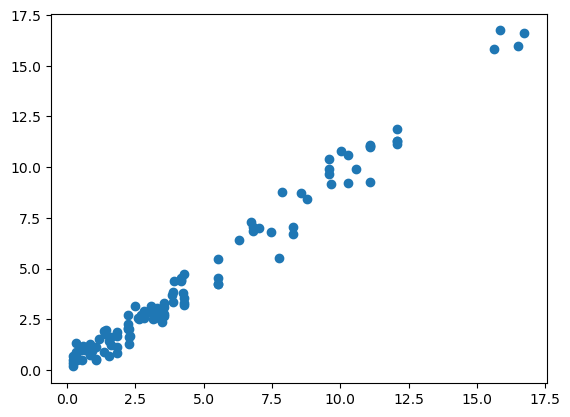

In [59]:
plt.scatter(a[0][0], a[0][1])

In [56]:
a

array([[[0.44000316, 0.44000316, 0.44000316, 0.44000316, 0.6596032 ,
         0.6596032 , 0.6596032 , 0.6596032 , 0.9728031 , 0.80430317,
         0.8368032 , 0.9728031 , 1.0290031 , 1.1591032 , 1.1449032 ,
         1.0290031 , 1.3992032 , 1.2866032 , 1.2866032 , 1.2866032 ,
         1.5356032 , 1.6197032 , 1.5356032 , 1.5356032 ],
        [1.3504032 , 0.32390317, 0.8396032 , 0.6091032 , 0.9346032 ,
         0.7684032 , 0.48520318, 0.31850317, 1.1244031 , 0.92700315,
         1.1171032 , 1.1724032 , 1.0151032 , 0.95070314, 0.88180315,
         0.7681032 , 1.3454032 , 0.98570323, 0.8743032 , 0.8083032 ,
         1.2771032 , 1.9212031 , 0.84660316, 0.9958031 ]]], dtype=float32)